In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Preparation


## Load datasets

In [3]:
sentiment_df = pd.read_csv('fear_greed_index.csv')

trader_df = pd.read_csv('historical_data.csv')

## Basic quality checks

In [ ]:
sentiment_df.head()
trader_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05
5,1517895000,8,Extreme Fear,2018-02-06
6,1517981400,36,Fear,2018-02-07
7,1518067800,30,Fear,2018-02-08
8,1518154200,44,Fear,2018-02-09
9,1518240600,54,Neutral,2018-02-10


In [7]:
print("Sentiment dataset shape:", sentiment_df.shape)
print("Trades dataset shape:", trader_df.shape)

Sentiment dataset shape: (2644, 4)
Trades dataset shape: (211224, 16)


In [8]:
print("Sentiment columns & dtypes:")
print(sentiment_df.dtypes)

Sentiment columns & dtypes:
timestamp          int64
value              int64
classification    object
date              object
dtype: object


In [9]:
print("\nTrades columns & dtypes:")
print(trader_df.dtypes)


Trades columns & dtypes:
Account              object
Coin                 object
Execution Price     float64
Size Tokens         float64
Size USD            float64
Side                 object
Timestamp IST        object
Start Position      float64
Direction            object
Closed PnL          float64
Transaction Hash     object
Order ID              int64
Crossed                bool
Fee                 float64
Trade ID            float64
Timestamp           float64
dtype: object


In [10]:
print("Missing values in Sentiment data:")
print(sentiment_df.isnull().sum())

Missing values in Sentiment data:
timestamp         0
value             0
classification    0
date              0
dtype: int64


In [11]:
print("\nMissing values in Trades data:")
print(trader_df.isnull().sum())


Missing values in Trades data:
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64


In [12]:
print("Duplicate rows in Sentiment:", sentiment_df.duplicated().sum())
print("Duplicate rows in Trades:", trader_df.duplicated().sum())

Duplicate rows in Sentiment: 0
Duplicate rows in Trades: 0


## Timestamp conversion & alignment

In [13]:
sentiment_df["timestamp"] = pd.to_datetime(sentiment_df["timestamp"], unit="s")
sentiment_df["date"] = pd.to_datetime(sentiment_df["date"])

sentiment_df["date_only"] = sentiment_df["date"].dt.normalize()

trader_df["Timestamp IST"] = pd.to_datetime(trader_df["Timestamp IST"], dayfirst=True)

trader_df["Timestamp"] = pd.to_datetime(trader_df["Timestamp"], unit="ms")

trader_df["date_only"] = trader_df["Timestamp IST"].dt.normalize()

merged_df = trader_df.merge(
    sentiment_df,
    on="date_only",
    how="left"
)

print(merged_df.head())

                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side       Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY 2024-12-02 22:50:00        0.000000       Buy   
1        16.00    127.68  BUY 2024-12-02 22:50:00      986.524596       Buy   
2       144.09   1150.63  BUY 2024-12-02 22:50:00     1002.518996       Buy   
3       142.98   1142.04  BUY 2024-12-02 22:50:00     1146.558564       Buy   
4         8.73     69.75  BUY 2024-12-02 22:50:00     1289.488521       Buy   

   Closed PnL  ...     Order ID  Crossed       Fee      Trade ID  \
0         0.0  ...  5201

In [23]:
merged_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Crossed,Fee,Trade ID,Timestamp,date_only,timestamp,value,classification,date,win
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,...,True,0.345404,8.950000e+14,2024-10-27 03:33:20,2024-12-02,2024-12-02 05:30:00,80.0,Extreme Greed,2024-12-02,False
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,...,True,0.005600,4.430000e+14,2024-10-27 03:33:20,2024-12-02,2024-12-02 05:30:00,80.0,Extreme Greed,2024-12-02,False
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,...,True,0.050431,6.600000e+14,2024-10-27 03:33:20,2024-12-02,2024-12-02 05:30:00,80.0,Extreme Greed,2024-12-02,False
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,...,True,0.050043,1.080000e+15,2024-10-27 03:33:20,2024-12-02,2024-12-02 05:30:00,80.0,Extreme Greed,2024-12-02,False
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,...,True,0.003055,1.050000e+15,2024-10-27 03:33:20,2024-12-02,2024-12-02 05:30:00,80.0,Extreme Greed,2024-12-02,False


## Feature Engineering (Key Metrics)

### Daily Profit&Loss per Trader

In [14]:
daily_pnl = round (( merged_df.groupby(['date_only', 'Account'])['Closed PnL'].sum().reset_index().rename(columns={'Closed PnL': 'Daily PnL'}) ), 4)

display(daily_pnl.head())

,date_only,Account,Daily PnL
0,2023-05-01,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,0.0000
1,2023-12-05,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,0.0000
2,2023-12-14,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,-205.4347
3,2023-12-15,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,-24.6320
4,2023-12-16,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,0.0000


### Win Rate

In [15]:
merged_df["win"] = merged_df["Closed PnL"] > 0

win_rate = round(
    merged_df.groupby("Account")["win"]
    .mean()
    .reset_index()
    .rename(columns={"win": "Win Rate"})*100, 3)

display(win_rate.head())

,Account,Win Rate
0,0x083384f897ee0f19899168e3b1bec365f52a90120x08...,35.961
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd0x23...,44.272
2,0x271b280974205ca63b716753467d5a371de622ab0x27...,30.192
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c40x28...,43.858
4,0x2c229d22b100a7beb69122eed721cee9b24011dd0x2c...,51.991


In [16]:
avg_trade_size = merged_df["Size USD"].mean()
print("Overall Avg Trade Size:", avg_trade_size)

Overall Avg Trade Size: 5639.4512103738225


### Average Trade Size

In [17]:
avg_trade_size = round(
    merged_df.groupby("Account")["Size USD"]
    .mean()
    .reset_index()
    .rename(columns={"Size USD": "Avg Trade Size"})
, 3)

display(avg_trade_size.head())

,Account,Avg Trade Size
0,0x083384f897ee0f19899168e3b1bec365f52a9012,16159.577
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,1653.226
2,0x271b280974205ca63b716753467d5a371de622ab,8893.001
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,507.627
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,3138.895


In [18]:
avg_trade_size_daily = (
    merged_df
    .groupby("date_only")["Size USD"]
    .mean()
    .reset_index()
    .rename(columns={"Size USD": "avg_trade_size_usd"})
)

display(avg_trade_size_daily.head())

,date_only,avg_trade_size_usd
0,2023-05-01,159.000000
1,2023-12-05,5556.203333
2,2023-12-14,10291.213636
3,2023-12-15,5304.975000
4,2023-12-16,5116.256667


### Number of trades per day

In [19]:
trades_per_day = (
    merged_df.groupby("date_only")["Trade ID"].count()
    .reset_index()
    .rename(columns={"Trade ID": "trades_count"})
)

display(trades_per_day.head())

,date_only,trades_count
0,2023-05-01,3
1,2023-12-05,9
2,2023-12-14,11
3,2023-12-15,2
4,2023-12-16,3


### Long/Short Ratio

In [ ]:
longShort_df = merged_df[merged_df["Direction"].isin(["Buy", "Sell"])].copy()


longShort_df["LS_direction"] = longShort_df["Direction"].replace({
    "Buy": "Long",
    "Sell": "Short"
})

long_short_daily = (
    longShort_df
    .groupby(["date_only", "LS_direction"])["Trade ID"]
    .count()
    .unstack(fill_value=0)
)

long_short_daily["long_short_ratio"] = (
    long_short_daily["Long"] / (long_short_daily["Short"] + 1)
)

display(long_short_daily.head())


LS_direction,Long,Short,long_short_ratio
date_only,,,
2024-04-16,0,2,0.0
2024-04-20,20,0,20.0
2024-04-25,68,0,68.0
2024-04-26,0,3,0.0
2024-04-28,0,50,0.0


### Leverage Proxy

In [ ]:
merged_df["leverage_proxy"] = merged_df["Size USD"]

print(merged_df[["Size USD", "leverage_proxy"]].head())

   Size USD  leverage_proxy
0   7872.16         7872.16
1    127.68          127.68
2   1150.63         1150.63
3   1142.04         1142.04
4     69.75           69.75


In [30]:
merged_df["size_bucket"] = pd.cut(
    merged_df["Size USD"],
    bins=[0, 100, 500, 1000, 5000, 10000, 50000, 1e9],
    labels=["0-100","100-500","500-1k","1k-5k","5k-10k","10k-50k","50k+"]
)

leverage_distribution = (
    merged_df["size_bucket"]
    .value_counts()
    .reset_index(name="count")
)

leverage_distribution.head()

,size_bucket,count
0,1k-5k,53138
1,100-500,53008
2,0-100,37824
3,500-1k,36619
4,10k-50k,14471


# Part B (Analysis)

### Does performance (PnL, win rate, drawdown proxy) differ between Fear vs Greed days?


In [ ]:
performance = (
    merged_df
    .groupby(["date_only", "classification"])
    .agg(
        total_pnl = ("Closed PnL", "sum"),      
        win_rate = ("win", "mean"),            
        drawdown_proxy = ("Closed PnL", "min")
    )
    .reset_index()
)

display(performance.head())

,date_only,classification,total_pnl,win_rate,drawdown_proxy
0,2023-05-01,Greed,0.000000,0.000000,0.000000
1,2023-12-05,Extreme Greed,0.000000,0.000000,0.000000
2,2023-12-14,Greed,-205.434737,0.363636,-514.003130
3,2023-12-15,Greed,-24.632034,0.000000,-15.479828
4,2023-12-16,Greed,0.000000,0.000000,0.000000


In [ ]:
# Comparision (Fear vs Greed)

pnl_comparison = (
    performance
    .groupby("classification")["total_pnl"]
    .mean()
)

display(pnl_comparison)

winrate_comparison = (
    performance
    .groupby("classification")["win_rate"]
    .mean()
)

display(winrate_comparison)

drawdown_comparison = (
    performance
    .groupby("classification")["drawdown_proxy"]
    .mean()
)

display(drawdown_comparison)


classification
Extreme Fear     52793.589178
Extreme Greed    23817.292199
Fear             36891.818040
Greed            11140.566181
Neutral          19297.323516
Name: total_pnl, dtype: float64

classification
Extreme Fear     0.327341
Extreme Greed    0.467424
Fear             0.329112
Greed            0.335986
Neutral          0.331886
Name: win_rate, dtype: float64

classification
Extreme Fear    -7999.779096
Extreme Greed    -455.228297
Fear            -1892.436526
Greed           -1509.674833
Neutral         -1381.746584
Name: drawdown_proxy, dtype: float64

In [ ]:
# Final Performance Summary

performance_summary = pd.DataFrame({
    "avg_daily_pnl": pnl_comparison,
    "avg_win_rate": winrate_comparison,
    "avg_drawdown": drawdown_comparison
})

display(performance_summary)

,avg_daily_pnl,avg_win_rate,avg_drawdown
classification,,,
Extreme Fear,52793.589178,0.327341,-7999.779096
Extreme Greed,23817.292199,0.467424,-455.228297
Fear,36891.818040,0.329112,-1892.436526
Greed,11140.566181,0.335986,-1509.674833
Neutral,19297.323516,0.331886,-1381.746584


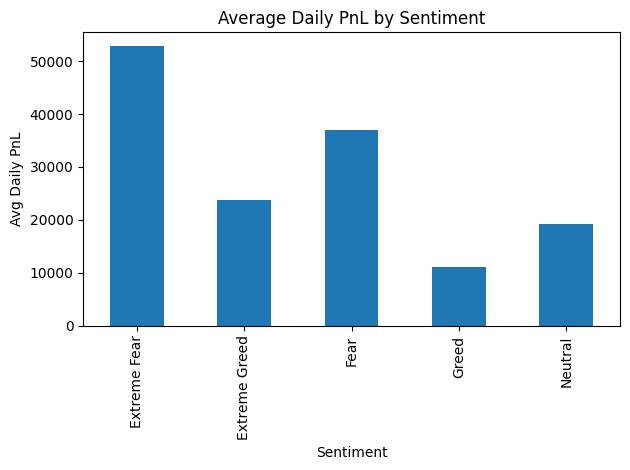

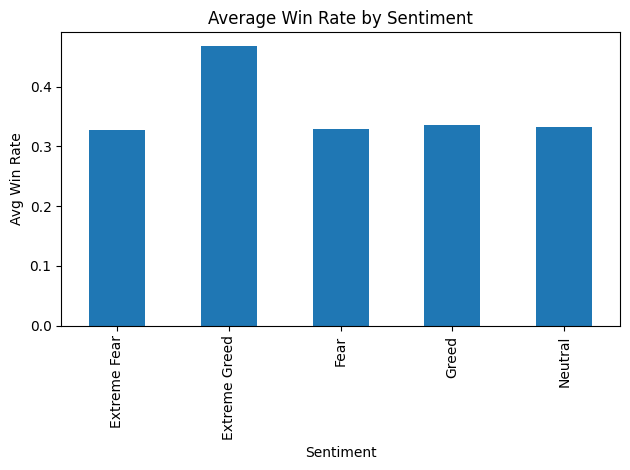

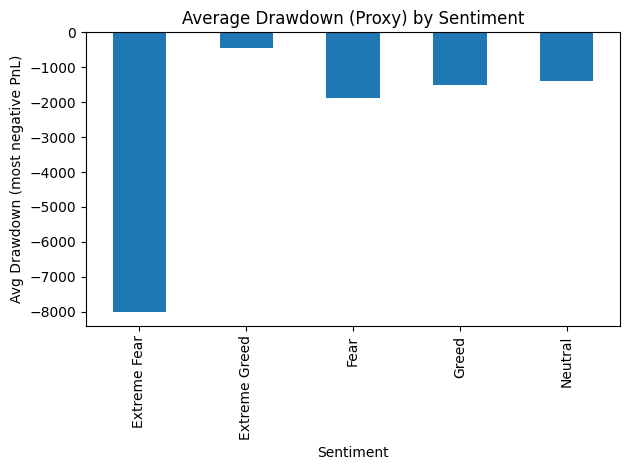

In [76]:
plt.figure()
performance_summary["avg_daily_pnl"].plot(kind="bar")
plt.title("Average Daily PnL by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Avg Daily PnL")
plt.tight_layout()
plt.show()

plt.figure()
performance_summary["avg_win_rate"].plot(kind="bar")
plt.title("Average Win Rate by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Avg Win Rate")
plt.tight_layout()
plt.show()

plt.figure()
performance_summary["avg_drawdown"].plot(kind="bar")
plt.title("Average Drawdown (Proxy) by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Avg Drawdown (most negative PnL)")
plt.tight_layout()
plt.show()

#### Conclusion — Performance vs Sentiment

- **PnL:** Average daily PnL is higher on Fear days than on Greed days.  
- **Win rate:** Win rate is higher on Greed days than on Fear days.  
- **Drawdown proxy:** Drawdowns are more negative (worse) on Fear days than on Greed days.  

Fear days are more profitable on average but riskier, while Greed days are steadier with more frequent winning trades

### Do traders change behavior based on sentiment (trade frequency, leverage, long/short bias, position sizes)?


In [37]:
daily_trades = (
    merged_df
    .groupby(["date_only", "classification"])["Trade ID"]
    .count()
    .reset_index(name="num_trades")
)

trade_freq_summary = (
    daily_trades
    .groupby("classification")["num_trades"]
    .mean()
)

display(trade_freq_summary)

classification
Extreme Fear     1528.571429
Extreme Greed     350.807018
Fear              679.527473
Greed             260.637306
Neutral           562.477612
Name: num_trades, dtype: float64

In [38]:
daily_leverage = (
    merged_df
    .groupby(["date_only", "classification"])["Size USD"]
    .mean()
    .reset_index(name="avg_leverage_proxy")
)

leverage_summary = (
    daily_leverage
    .groupby("classification")["avg_leverage_proxy"]
    .mean()
)

display(leverage_summary)

classification
Extreme Fear     4091.804366
Extreme Greed    4410.524482
Fear             6524.294937
Greed            6735.295813
Neutral          7157.527121
Name: avg_leverage_proxy, dtype: float64

In [39]:
daily_position_size = (
    merged_df
    .groupby(["date_only", "classification"])["Size USD"]
    .mean()
    .reset_index(name="avg_position_size")
)

position_size_summary = (
    daily_position_size
    .groupby("classification")["avg_position_size"]
    .mean()
)

display(position_size_summary)

classification
Extreme Fear     4091.804366
Extreme Greed    4410.524482
Fear             6524.294937
Greed            6735.295813
Neutral          7157.527121
Name: avg_position_size, dtype: float64

In [40]:
long_short_daily = (
    long_short_daily
    .reset_index()
    .merge(
        sentiment_df[["date_only", "classification"]],
        on="date_only",
        how="left"
    )
)

long_short_summary = (
    long_short_daily
    .groupby("classification")["long_short_ratio"]
    .mean()
)

display(long_short_summary)

classification
Extreme Fear     2.394566
Extreme Greed    2.777898
Fear             6.287379
Greed            6.620138
Neutral          5.993707
Name: long_short_ratio, dtype: float64

In [ ]:
# Summary of Trader Behavior by Sentiment

behavior_summary = pd.DataFrame({
    "avg_trades_per_day": trade_freq_summary,
    "avg_leverage_proxy": leverage_summary,
    "avg_position_size": position_size_summary,
    "avg_long_short_ratio": long_short_summary
})

display(behavior_summary)


,avg_trades_per_day,avg_leverage_proxy,avg_position_size,avg_long_short_ratio
classification,,,,
Extreme Fear,1528.571429,4091.804366,4091.804366,2.394566
Extreme Greed,350.807018,4410.524482,4410.524482,2.777898
Fear,679.527473,6524.294937,6524.294937,6.287379
Greed,260.637306,6735.295813,6735.295813,6.620138
Neutral,562.477612,7157.527121,7157.527121,5.993707


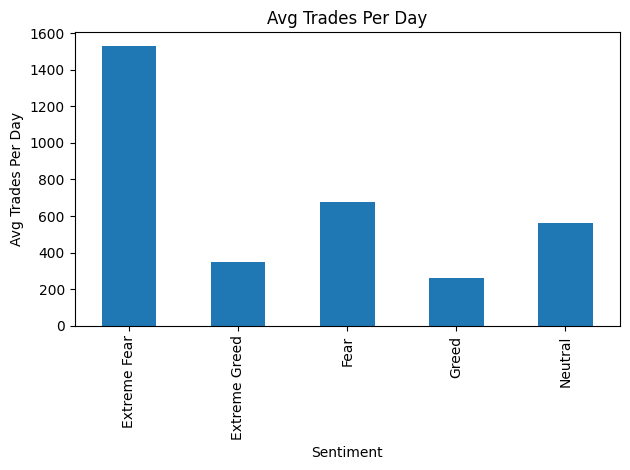

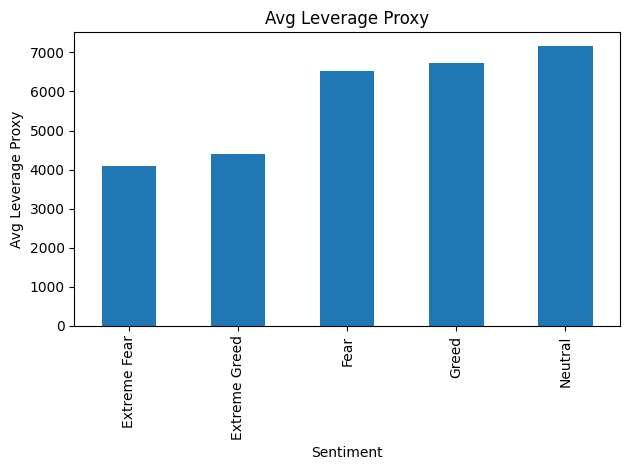

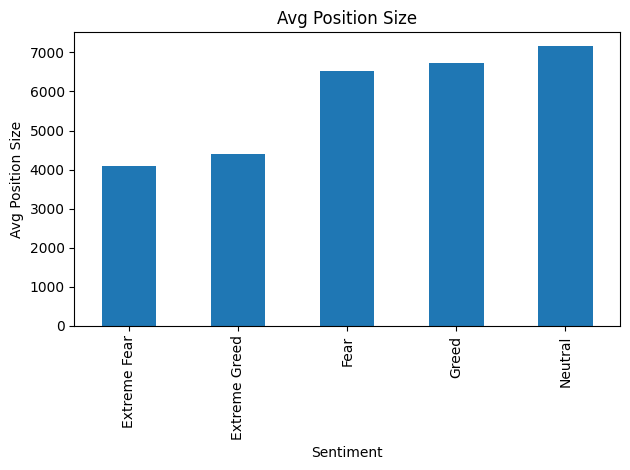

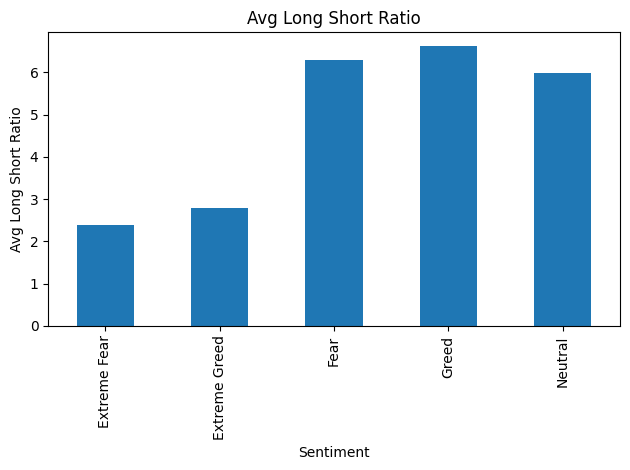

In [77]:
for col in behavior_summary.columns:
    plt.figure()
    behavior_summary[col].plot(kind="bar")
    plt.title(col.replace("_", " ").title())
    plt.xlabel("Sentiment")
    plt.ylabel(col.replace("_", " ").title())
    plt.tight_layout()
    plt.show()

#### Conclusion 

- **Trade frequency:** Trading activity is highest on Fear/Extreme Fear days and lower on Greed days.  
- **Leverage / Position size:** Average trade size is smaller during Fear and larger during Greed/Neutral periods.  
- **Long/Short bias:** Traders are more bullish (higher long/short ratio) on Greed days and less bullish on Fear days.  

Traders clearly change their behavior with sentiment. They trade more but with smaller sizes in fear and trade less but with larger and more bullish positions in Greed.

### Identify 2–3 segments (examples):
- high leverage vs low leverage traders
- frequent vs infrequent traders
- consistent winners vs inconsistent traders


#### Segment 1 — High vs Low Leverage Traders

In [ ]:
leverage_per_trader = (
    merged_df
    .groupby("Account")["Size USD"]
    .mean()
    .reset_index(name="avg_trade_size")
)

leverage_per_trader["leverage_segment"] = pd.qcut(
    leverage_per_trader["avg_trade_size"],
    q=2,
    labels=["Low Leverage", "High Leverage"]
)

display(leverage_per_trader.head())

,Account,avg_trade_size,leverage_segment
0,0x083384f897ee0f19899168e3b1bec365f52a9012,16159.576734,High Leverage
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,1653.226327,Low Leverage
2,0x271b280974205ca63b716753467d5a371de622ab,8893.000898,High Leverage
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,507.626933,Low Leverage
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,3138.894782,Low Leverage


In [43]:
pnl_per_trader = (
    merged_df
    .groupby("Account")["Closed PnL"]
    .sum()
    .reset_index(name="total_pnl")
)

leverage_vs_pnl = leverage_per_trader.merge(pnl_per_trader, on="Account")

display(
    leverage_vs_pnl.groupby("leverage_segment")["total_pnl"].mean()
)

C:\Users\joshi\AppData\Local\Temp\ipykernel_5448\1020819123.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  leverage_vs_pnl.groupby("leverage_segment")["total_pnl"].mean()


leverage_segment
Low Leverage     226753.967423
High Leverage    416805.966542
Name: total_pnl, dtype: float64

#### Segment 2 — Frequent vs Infrequent Traders

In [44]:
trades_per_trader = (
    merged_df
    .groupby("Account")["Trade ID"]
    .count()
    .reset_index(name="total_trades")
)

trades_per_trader["frequency_segment"] = pd.qcut(
    trades_per_trader["total_trades"],
    q=2,
    labels=["Infrequent", "Frequent"]
)

display(trades_per_trader.head())

,Account,total_trades,frequency_segment
0,0x083384f897ee0f19899168e3b1bec365f52a9012,3818,Frequent
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,7280,Frequent
2,0x271b280974205ca63b716753467d5a371de622ab,3809,Frequent
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,13311,Frequent
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,3239,Infrequent


In [45]:
freq_vs_pnl = trades_per_trader.merge(pnl_per_trader, on="Account")

display(
    freq_vs_pnl.groupby("frequency_segment")["total_pnl"].mean()
)

C:\Users\joshi\AppData\Local\Temp\ipykernel_5448\1969352231.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  freq_vs_pnl.groupby("frequency_segment")["total_pnl"].mean()


frequency_segment
Infrequent    147032.272750
Frequent      496527.661215
Name: total_pnl, dtype: float64

#### Segment 3 — Consistent vs Inconsistent Traders

In [46]:
win_rate = (
    merged_df
    .groupby("Account")["win"]
    .mean()
    .reset_index(name="win_rate")
)

win_rate["consistency_segment"] = pd.qcut(
    win_rate["win_rate"],
    q=2,
    labels=["Inconsistent", "Consistent"]
)

display(win_rate.head())

,Account,win_rate,consistency_segment
0,0x083384f897ee0f19899168e3b1bec365f52a9012,0.359612,Inconsistent
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,0.442720,Consistent
2,0x271b280974205ca63b716753467d5a371de622ab,0.301917,Inconsistent
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,0.438585,Consistent
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,0.519914,Consistent


In [47]:
consistency_vs_pnl = win_rate.merge(pnl_per_trader, on="Account")

display(
    consistency_vs_pnl.groupby("consistency_segment")["total_pnl"].mean()
)

C:\Users\joshi\AppData\Local\Temp\ipykernel_5448\2870856344.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  consistency_vs_pnl.groupby("consistency_segment")["total_pnl"].mean()


consistency_segment
Inconsistent    346799.665467
Consistent      296760.268498
Name: total_pnl, dtype: float64

#### Combined Segments

In [48]:
segments = (
    leverage_per_trader
    .merge(trades_per_trader, on="Account")
    .merge(win_rate, on="Account")
    .merge(pnl_per_trader, on="Account")
)

display(segments.head())

,Account,avg_trade_size,leverage_segment,total_trades,frequency_segment,win_rate,consistency_segment,total_pnl
0,0x083384f897ee0f19899168e3b1bec365f52a9012,16159.576734,High Leverage,3818,Frequent,0.359612,Inconsistent,1.600230e+06
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,1653.226327,Low Leverage,7280,Frequent,0.442720,Consistent,4.788532e+04
2,0x271b280974205ca63b716753467d5a371de622ab,8893.000898,High Leverage,3809,Frequent,0.301917,Inconsistent,-7.043619e+04
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,507.626933,Low Leverage,13311,Frequent,0.438585,Consistent,1.324648e+05
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,3138.894782,Low Leverage,3239,Infrequent,0.519914,Consistent,1.686580e+05


C:\Users\joshi\AppData\Local\Temp\ipykernel_5448\3691593181.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("leverage_segment")["total_pnl"]


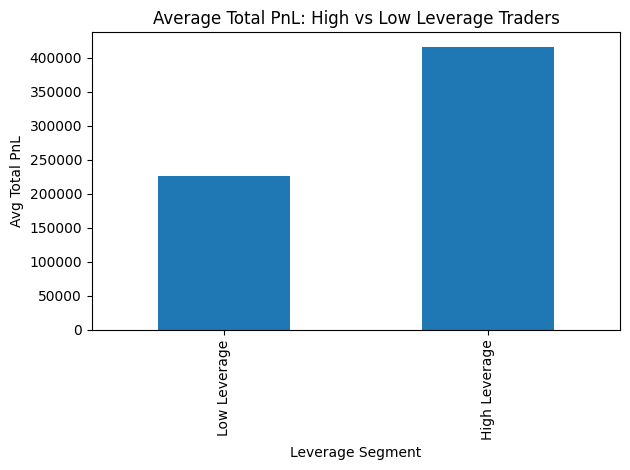

In [80]:
plt.figure()
(
    leverage_vs_pnl
    .groupby("leverage_segment")["total_pnl"]
    .mean()
    .plot(kind="bar")
)
plt.title("Average Total PnL: High vs Low Leverage Traders")
plt.xlabel("Leverage Segment")
plt.ylabel("Avg Total PnL")
plt.tight_layout()
plt.show()

C:\Users\joshi\AppData\Local\Temp\ipykernel_5448\1552187789.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("frequency_segment")["total_pnl"]


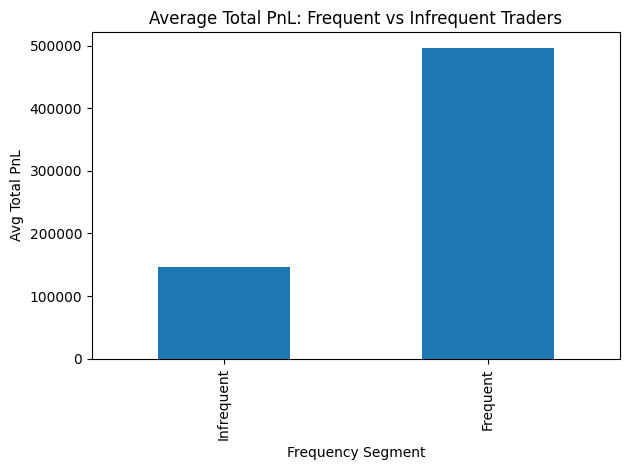

In [81]:
plt.figure()
(
    freq_vs_pnl
    .groupby("frequency_segment")["total_pnl"]
    .mean()
    .plot(kind="bar")
)
plt.title("Average Total PnL: Frequent vs Infrequent Traders")
plt.xlabel("Frequency Segment")
plt.ylabel("Avg Total PnL")
plt.tight_layout()
plt.show()

C:\Users\joshi\AppData\Local\Temp\ipykernel_5448\18315128.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("consistency_segment")["total_pnl"]


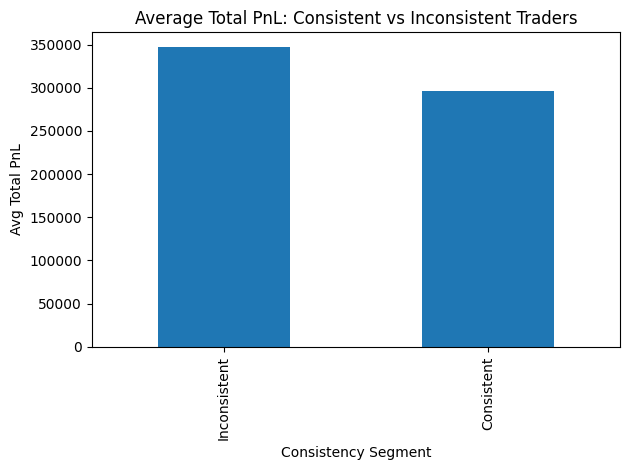

In [82]:
plt.figure()
(
    consistency_vs_pnl
    .groupby("consistency_segment")["total_pnl"]
    .mean()
    .plot(kind="bar")
)
plt.title("Average Total PnL: Consistent vs Inconsistent Traders")
plt.xlabel("Consistency Segment")
plt.ylabel("Avg Total PnL")
plt.tight_layout()
plt.show()


### Provide at least 3 insights backed by charts/tables.

#### Insight 1 : Performance vs Sentiment

In [83]:
display(performance_summary)

,avg_daily_pnl,avg_win_rate,avg_drawdown
classification,,,
Extreme Fear,52793.589178,0.327341,-7999.779096
Extreme Greed,23817.292199,0.467424,-455.228297
Fear,36891.818040,0.329112,-1892.436526
Greed,11140.566181,0.335986,-1509.674833
Neutral,19297.323516,0.331886,-1381.746584


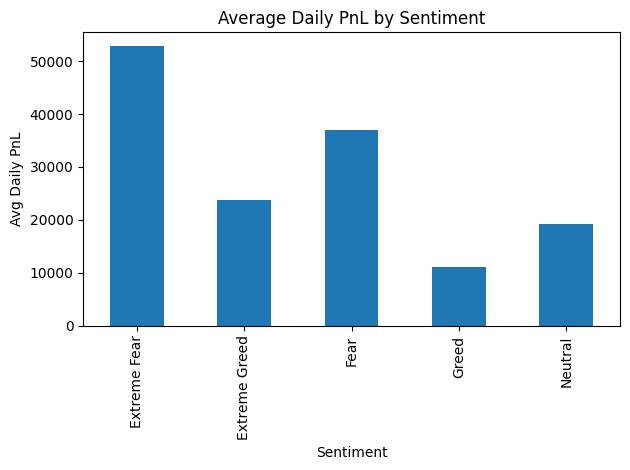

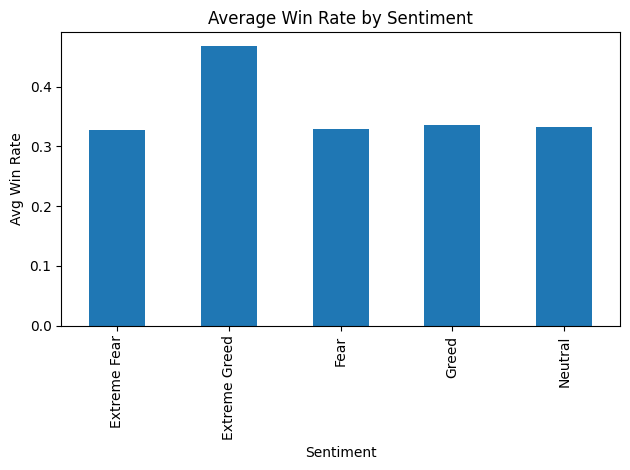

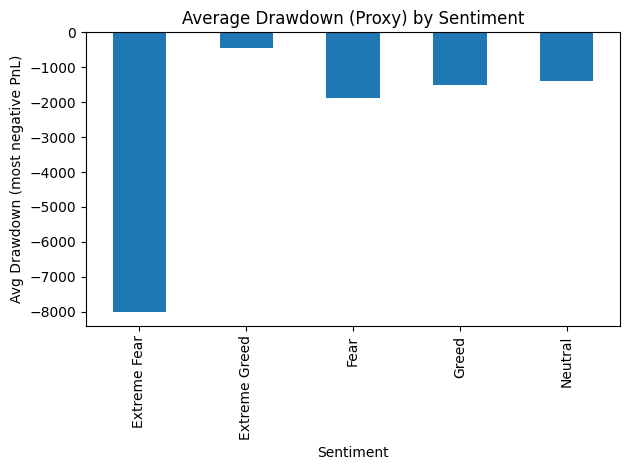

In [84]:
plt.figure()
performance_summary["avg_daily_pnl"].plot(kind="bar")
plt.title("Average Daily PnL by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Avg Daily PnL")
plt.tight_layout()
plt.show()


plt.figure()
performance_summary["avg_win_rate"].plot(kind="bar")
plt.title("Average Win Rate by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Avg Win Rate")
plt.tight_layout()
plt.show()


plt.figure()
performance_summary["avg_drawdown"].plot(kind="bar")
plt.title("Average Drawdown (Proxy) by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Avg Drawdown (most negative PnL)")
plt.tight_layout()
plt.show()


Average daily PnL is higher in Fear/Extreme Fear than in Greed indicating that traders were more profitable during fearful markets. However drawdown is also much worse in Extreme Fear showing higher downside risk. Win rates are relatively higher in Greed/Extreme Greed suggesting more frequent small wins even when total profitability is lower.

#### INSIGHT 2 — Trade Frequency vs Sentiment

In [85]:
display(trade_freq_summary)

classification
Extreme Fear     1528.571429
Extreme Greed     350.807018
Fear              679.527473
Greed             260.637306
Neutral           562.477612
Name: num_trades, dtype: float64

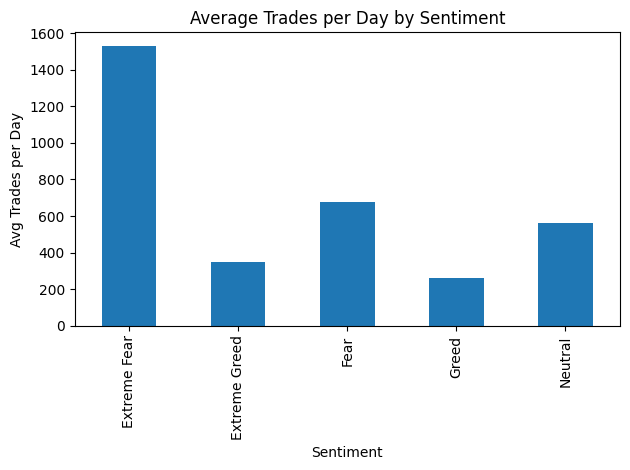

In [86]:
plt.figure()
trade_freq_summary.plot(kind="bar")
plt.title("Average Trades per Day by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Avg Trades per Day")
plt.tight_layout()
plt.show()


The chart shows that average trades per day are highest during Extreme Fear and lowest during Greed indicating that market stress triggers more trading activity likely due to panic selling or other stuff. In contrast Greed periods are comparatively calmer with fewer trades per day.

#### Insight 3 : Segmentation (High vs Low Leverage Traders)

In [89]:
display(leverage_summary)

leverage_segment
Low Leverage     226753.967423
High Leverage    416805.966542
Name: total_pnl, dtype: float64

C:\Users\joshi\AppData\Local\Temp\ipykernel_5448\3691593181.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("leverage_segment")["total_pnl"]


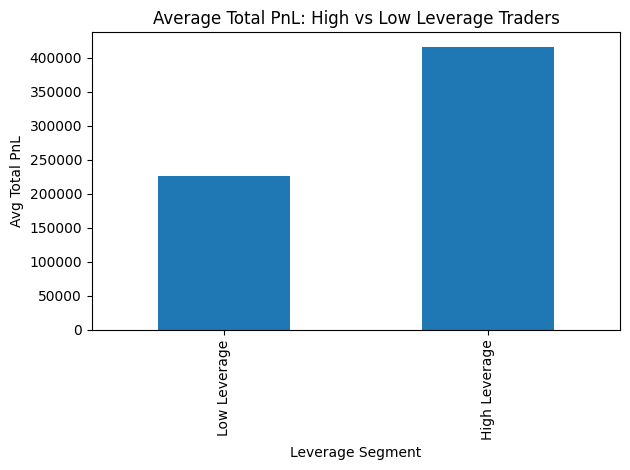

In [90]:
plt.figure()
(
    leverage_vs_pnl
    .groupby("leverage_segment")["total_pnl"]
    .mean()
    .plot(kind="bar")
)
plt.title("Average Total PnL: High vs Low Leverage Traders")
plt.xlabel("Leverage Segment")
plt.ylabel("Avg Total PnL")
plt.tight_layout()
plt.show()

High leverage traders (those taking larger average positions) tend to earn higher total PnL than low leverage traders but this comes with greater risk in their results. This suggests that taking larger positions can be more rewarding overall but it may also expose traders to bigger losses on bad trades.

## Part C

### Rule 1 — Risk Control in Extreme Fear

**Rule:**  
During *Extreme Fear* days, **high-leverage traders** should cap their position sizes and avoid excessive trading, because these days show the worst drawdowns and the highest trading activity, which together increase the risk of large losses.

Below we show the evidence supporting this rule.

,avg_drawdown
classification,
Extreme Fear,-7999.779096
Extreme Greed,-455.228297
Fear,-1892.436526
Greed,-1509.674833
Neutral,-1381.746584


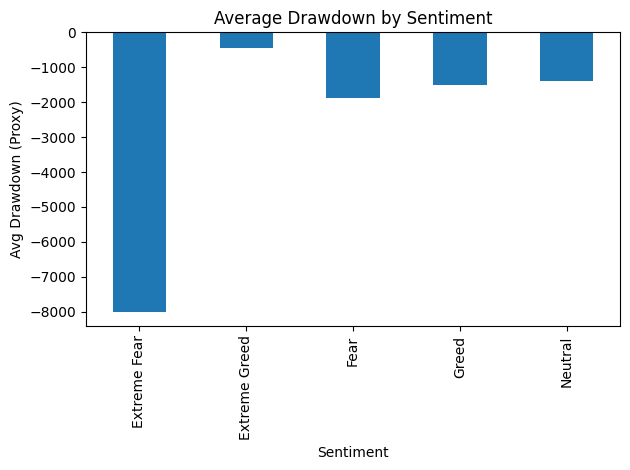

In [94]:
# Drawdown is worst in Extreme Fear
display(performance_summary[["avg_drawdown"]])

plt.figure()
performance_summary["avg_drawdown"].plot(kind="bar")
plt.title("Average Drawdown by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Avg Drawdown (Proxy)")
plt.tight_layout()
plt.show()

classification
Extreme Fear     1528.571429
Extreme Greed     350.807018
Fear              679.527473
Greed             260.637306
Neutral           562.477612
Name: num_trades, dtype: float64

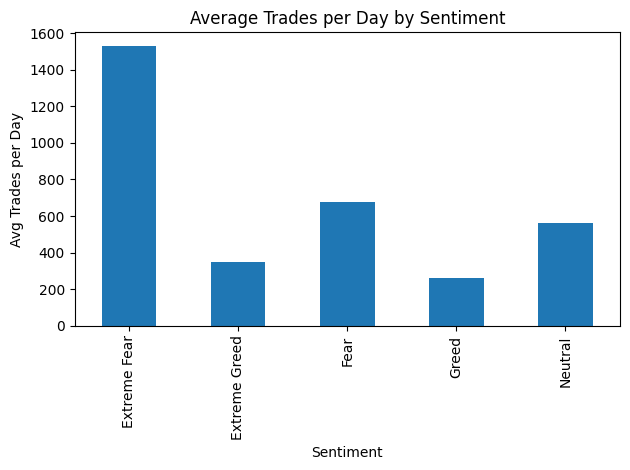

In [93]:
# Trading activity is highest in Extreme Fear

display(trade_freq_summary)

plt.figure()
trade_freq_summary.plot(kind="bar")
plt.title("Average Trades per Day by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Avg Trades per Day")
plt.tight_layout()
plt.show()

leverage_segment
Low Leverage     226753.967423
High Leverage    416805.966542
Name: total_pnl, dtype: float64

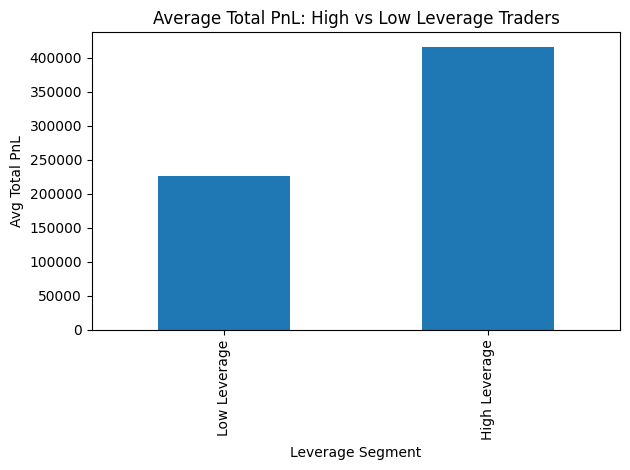

In [95]:
# High leverage traders are most exposed

display(leverage_summary)

plt.figure()
leverage_summary.plot(kind="bar")
plt.title("Average Total PnL: High vs Low Leverage Traders")
plt.xlabel("Leverage Segment")
plt.ylabel("Avg Total PnL")
plt.tight_layout()
plt.show()

### Rule 2 — Take more Long trades in Greed / Neutral but stay cautious

**Rule:**  
On *Greed and Neutral* days, frequent traders can trade more on the **Long (Buy)** side and take a bit bigger positions, since these days tend to be safer and more profitable than Extreme Fear days.

Below is the evidence supporting this rule.

,avg_win_rate
classification,
Extreme Fear,0.327341
Extreme Greed,0.467424
Fear,0.329112
Greed,0.335986
Neutral,0.331886


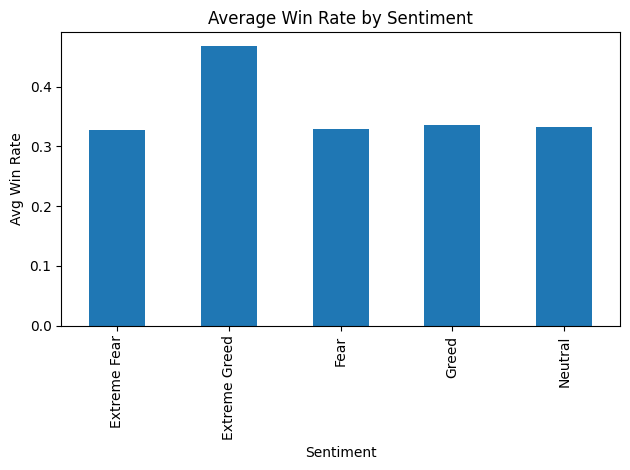

In [96]:
# Win rate is higher in Greed / Neutral

display(performance_summary[["avg_win_rate"]])

plt.figure()
performance_summary["avg_win_rate"].plot(kind="bar")
plt.title("Average Win Rate by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Avg Win Rate")
plt.tight_layout()
plt.show()

classification
Extreme Fear     2.394566
Extreme Greed    2.777898
Fear             6.287379
Greed            6.620138
Neutral          5.993707
Name: long_short_ratio, dtype: float64

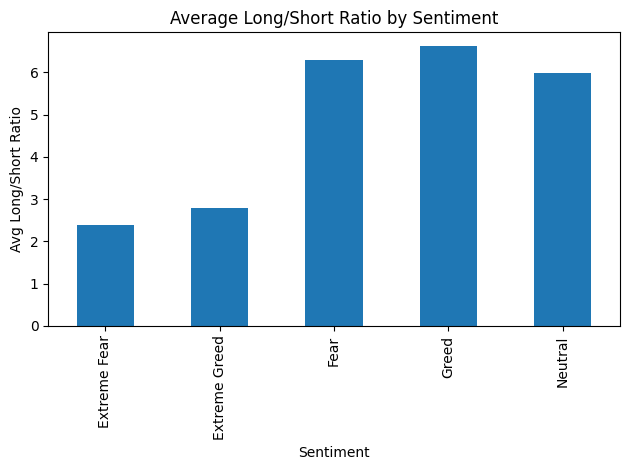

In [97]:
# Stronger Long bias in Greed / Neutral

display(long_short_summary)

plt.figure()
long_short_summary.plot(kind="bar")
plt.title("Average Long/Short Ratio by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Avg Long/Short Ratio")
plt.tight_layout()
plt.show()

,avg_drawdown
classification,
Extreme Fear,-7999.779096
Extreme Greed,-455.228297
Fear,-1892.436526
Greed,-1509.674833
Neutral,-1381.746584


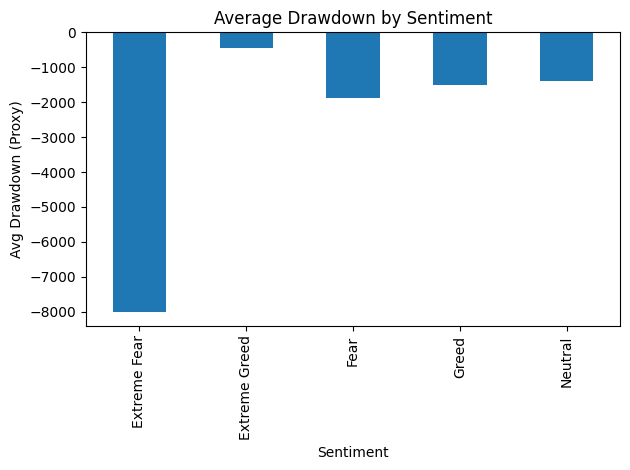

In [98]:
# Smaller drawdowns than Extreme Fear

display(performance_summary[["avg_drawdown"]])

plt.figure()
performance_summary["avg_drawdown"].plot(kind="bar")
plt.title("Average Drawdown by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Avg Drawdown (Proxy)")
plt.tight_layout()
plt.show()

# Bonus

## Simple Next Day Profitability Model

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [119]:
daily_features = (
    merged_df
    .groupby(["date_only", "classification"])
    .agg(
        total_pnl=("Closed PnL", "sum"),
        num_trades=("Trade ID", "count"),
        avg_trade_size=("Size USD", "mean"),
        long_trades=("Direction", lambda s: (s == "Buy").sum()),
        short_trades=("Direction", lambda s: (s == "Sell").sum()),
    )
    .reset_index()
    .sort_values("date_only")
)

daily_features["long_short_ratio"] = (
    daily_features["long_trades"] /
    (daily_features["short_trades"] + 1)
)

display(daily_features.head())

,date_only,classification,total_pnl,num_trades,avg_trade_size,long_trades,short_trades,long_short_ratio
0,2023-05-01,Greed,0.000000,3,159.000000,0,0,0.0
1,2023-12-05,Extreme Greed,0.000000,9,5556.203333,0,0,0.0
2,2023-12-14,Greed,-205.434737,11,10291.213636,0,0,0.0
3,2023-12-15,Greed,-24.632034,2,5304.975000,0,0,0.0
4,2023-12-16,Greed,0.000000,3,5116.256667,0,0,0.0


In [122]:
daily_features["next_day_pnl"] = daily_features["total_pnl"].shift(-1)

daily_features = daily_features.dropna(subset=["next_day_pnl"]).copy()

daily_features["pnl_bucket"] = pd.qcut(
    daily_features["next_day_pnl"],
    q=3,
    labels=["Low", "Medium", "High"]
)

display(daily_features.head())

,date_only,classification,total_pnl,num_trades,avg_trade_size,long_trades,short_trades,long_short_ratio,next_day_pnl,pnl_bucket
0,2023-05-01,Greed,0.000000,3,159.000000,0,0,0.0,0.000000,Low
1,2023-12-05,Extreme Greed,0.000000,9,5556.203333,0,0,0.0,-205.434737,Low
2,2023-12-14,Greed,-205.434737,11,10291.213636,0,0,0.0,-24.632034,Low
3,2023-12-15,Greed,-24.632034,2,5304.975000,0,0,0.0,0.000000,Low
4,2023-12-16,Greed,0.000000,3,5116.256667,0,0,0.0,304.982785,Medium


In [123]:
X = daily_features[
    ["classification", "num_trades", "avg_trade_size", "long_short_ratio"]
]

y = daily_features["pnl_bucket"]


In [125]:
preprocessor = ColumnTransformer(
    transformers=[
        ("sentiment", OneHotEncoder(), ["classification"])
    ],
    remainder="passthrough",
)

model = Pipeline(
    steps=[
        ("prep", preprocessor),
        ("clf", LogisticRegression(max_iter=1000)),
    ]
)

In [126]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

model.fit(X_train, y_train)

c:\Users\joshi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,steps,"[('prep', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('sentiment', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [127]:
preds = model.predict(X_test)

print("=== Next-day Profitability Bucket Model ===")
print(classification_report(y_test, preds))

=== Next-day Profitability Bucket Model ===
              precision    recall  f1-score   support

        High       0.74      0.65      0.69        48
         Low       0.56      0.48      0.52        48
      Medium       0.54      0.69      0.61        48

    accuracy                           0.60       144
   macro avg       0.61      0.60      0.60       144
weighted avg       0.61      0.60      0.60       144



In [128]:
display(daily_features.head())

,date_only,classification,total_pnl,num_trades,avg_trade_size,long_trades,short_trades,long_short_ratio,next_day_pnl,pnl_bucket
0,2023-05-01,Greed,0.000000,3,159.000000,0,0,0.0,0.000000,Low
1,2023-12-05,Extreme Greed,0.000000,9,5556.203333,0,0,0.0,-205.434737,Low
2,2023-12-14,Greed,-205.434737,11,10291.213636,0,0,0.0,-24.632034,Low
3,2023-12-15,Greed,-24.632034,2,5304.975000,0,0,0.0,0.000000,Low
4,2023-12-16,Greed,0.000000,3,5116.256667,0,0,0.0,304.982785,Medium


## Clustering Traders into Behavioral Archetypes

In [129]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [130]:
trader_features = (
    merged_df
    .groupby("Account")
    .agg(
        avg_trade_size=("Size USD", "mean"),
        total_trades=("Trade ID", "count"),
        win_rate=("win", "mean"),
        total_pnl=("Closed PnL", "sum"),
    )
    .reset_index()
)

display(trader_features.head())

,Account,avg_trade_size,total_trades,win_rate,total_pnl
0,0x083384f897ee0f19899168e3b1bec365f52a9012,16159.576734,3818,0.359612,1.600230e+06
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,1653.226327,7280,0.442720,4.788532e+04
2,0x271b280974205ca63b716753467d5a371de622ab,8893.000898,3809,0.301917,-7.043619e+04
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,507.626933,13311,0.438585,1.324648e+05
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,3138.894782,3239,0.519914,1.686580e+05


In [131]:
X = trader_features[["avg_trade_size", "total_trades", "win_rate", "total_pnl"]]

In [132]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [133]:
kmeans = KMeans(n_clusters=3, random_state=42)
trader_features["cluster"] = kmeans.fit_predict(X_scaled)

In [134]:
cluster_summary = (
    trader_features
    .groupby("cluster")
    .agg({
        "avg_trade_size": "mean",
        "total_trades": "mean",
        "win_rate": "mean",
        "total_pnl": "mean",
        "Account": "count"
    })
    .rename(columns={"Account": "num_traders"})
)

In [135]:
display(cluster_summary)

,avg_trade_size,total_trades,win_rate,total_pnl,num_traders
cluster,,,,,
0,14150.207714,14940.714286,0.398961,955963.386103,7
1,4546.315337,4820.153846,0.317379,115092.796929,13
2,2841.682205,3664.750000,0.498279,175750.740053,12
